In [2]:
import gensim
from gensim.models import Word2Vec

In [3]:
from gensim.models import FastText
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [4]:
skipgram_50 = Word2Vec.load("skipgram_50.bin")

In [5]:
fast_n_100 = Word2Vec.load("fast_n_100.bin")

In [6]:
X = skipgram_50.wv[skipgram_50.wv.index_to_key] #This command aims at bringing word embeddings of all the words in the vocab
pca = PCA(n_components=2)
result = pca.fit_transform(X)

Text(1.187646, 0.29948193, 'patient')

Text(1.2839911, 0.46495706, 'covid')

Text(1.1471579, -0.16208114, 'study')

Text(1.0922586, 0.103210546, 'group')

Text(1.1417469, 0.45259133, 'day')

Text(1.0697837, 0.5495031, 'treatment')

Text(1.2107446, 0.9603173, 'sars')

Text(1.2074193, 0.8365731, 'disease')

Text(1.309038, 0.21034476, 'clinical')

Text(1.2579232, 0.53273064, 'br')

<function matplotlib.pyplot.show(close=None, block=None)>

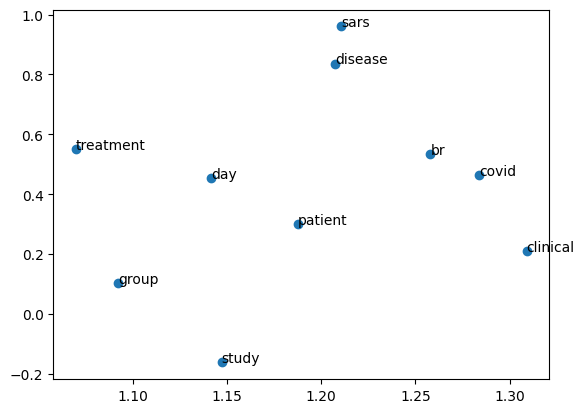

In [7]:
# plot the pca of skipgram_50
plt.scatter(result[:10,0],result[:10,1])
words=list(skipgram_50.wv.index_to_key)
for i,word in enumerate(words[:10]):
    plt.annotate(word, xy=(result[i,0],result[i,1]))

plt.show

In [8]:
# pca plot for fasttext
X_fast = fast_n_100.wv[fast_n_100.wv.index_to_key]
pca_fast = PCA(n_components=2)
fast_result = pca_fast.fit_transform(X_fast)

Text(-0.77273023, 0.036083095, 'patient')

Text(-0.2160192, -0.058480468, 'covid')

Text(-0.17410101, 0.033827256, 'study')

Text(0.028095076, -0.14419036, 'group')

Text(0.06786464, 0.01070722, 'day')

Text(-0.8636472, -0.4794613, 'treatment')

Text(0.2445114, -0.16383569, 'sars')

Text(-0.7511229, -0.32442415, 'disease')

Text(-0.719958, -0.26904348, 'clinical')

Text(0.64762396, -0.26014683, 'br')

<function matplotlib.pyplot.show(close=None, block=None)>

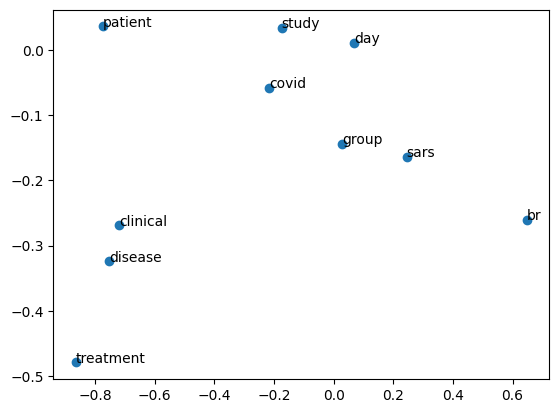

In [9]:
plt.scatter(fast_result[:10,0],fast_result[:10,1])
words_fast = list(fast_n_100.wv.index_to_key)
for i,words_fast in enumerate(words_fast[:10]):
    plt.annotate(words_fast,xy=(fast_result[i,0],fast_result[i,1]))
plt.show

In [10]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize

In [11]:
df = pd.read_csv('processed_text.csv')

C:\Users\Gyegn\AppData\Local\Temp\ipykernel_20508\2584791412.py:1: DtypeWarning: Columns (22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,134,135,136,137,138,139,140,141,144,145) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('processed_text.csv')


In [12]:
df['Abstract'].shape[0]

12126

In [13]:
#let the vector size 
vector_size = 100

In [14]:
# function to take average of all fasttext vectors of each word in abstract

k1 = [] #create a list to store vector representation of each abstract

for i in range(df['Abstract'].shape[0]):
    K = np.zeros([vector_size,1])

    count = 0 # set the count of words from the abstract be zero
    for word in word_tokenize(df['Abstract'][i]):
        if word in fast_n_100.wv.index_to_key:
            count+=1
            K += fast_n_100.wv['word'].reshape(vector_size,1)
    K = K/count
    k1.append(list(K))

k1_array = np.array(k1)
k1 = k1_array.reshape(df.shape[0],vector_size)


In [15]:
k1.shape

(12126, 100)

In [32]:
np.savetxt("model1_fast_n_100.csv", k1, delimiter=",")

In [16]:
# Another way of finding the average
def get_mean_vector(model,words):
    words = [word for word in word_tokenize(words) if word in list(model.wv.index_to_key)] #Add the word to list of words if found in vocab
    if len(words)>1:
        return np.mean(model.wv[words], axis=0)
    else:
        return np.zeros([vector_size])

In [18]:
k2 = []
for i in df.Abstract:
    k2.append(list(get_mean_vector(skipgram_50,i)))

k2 = pd.DataFrame(k2)


In [19]:
k2.shape

(12126, 100)

In [33]:
k2.to_csv("method2_skipgram_50.csv")

In [ ]:
k1.head

100

In [27]:
# Converting title also into vectors
k_title=[]
for i in df.Title:
    k_title.append(list(get_mean_vector(skipgram_50,i)))

k_title = pd.DataFrame(k_title)

In [28]:
k_title.shape

(12126, 100)

In [34]:
k_title.to_csv("method2_skipgram_50_title.csv")

In [29]:
# Lets try using fasttext model in the second approach just changing the model name in the get_mean_vector
k_fasttext = []

for i in df.Abstract:
    k_fasttext.append(list(get_mean_vector(fast_n_100,i)))

k_fasttext = pd.DataFrame(k_fasttext)

In [35]:
k_fasttext.to_csv("k_fasttext_abstract.csv")